<a href="https://colab.research.google.com/github/siam99773/machine_learning_computer_vision/blob/main/class_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-fac5f3341437>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x * vy / vx) + y)
<ipython-input-5-fac5f3341437>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((image.shape[1] - x) * vy / vx) + y)
<ipython-input-5-fac5f3341437>:60: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


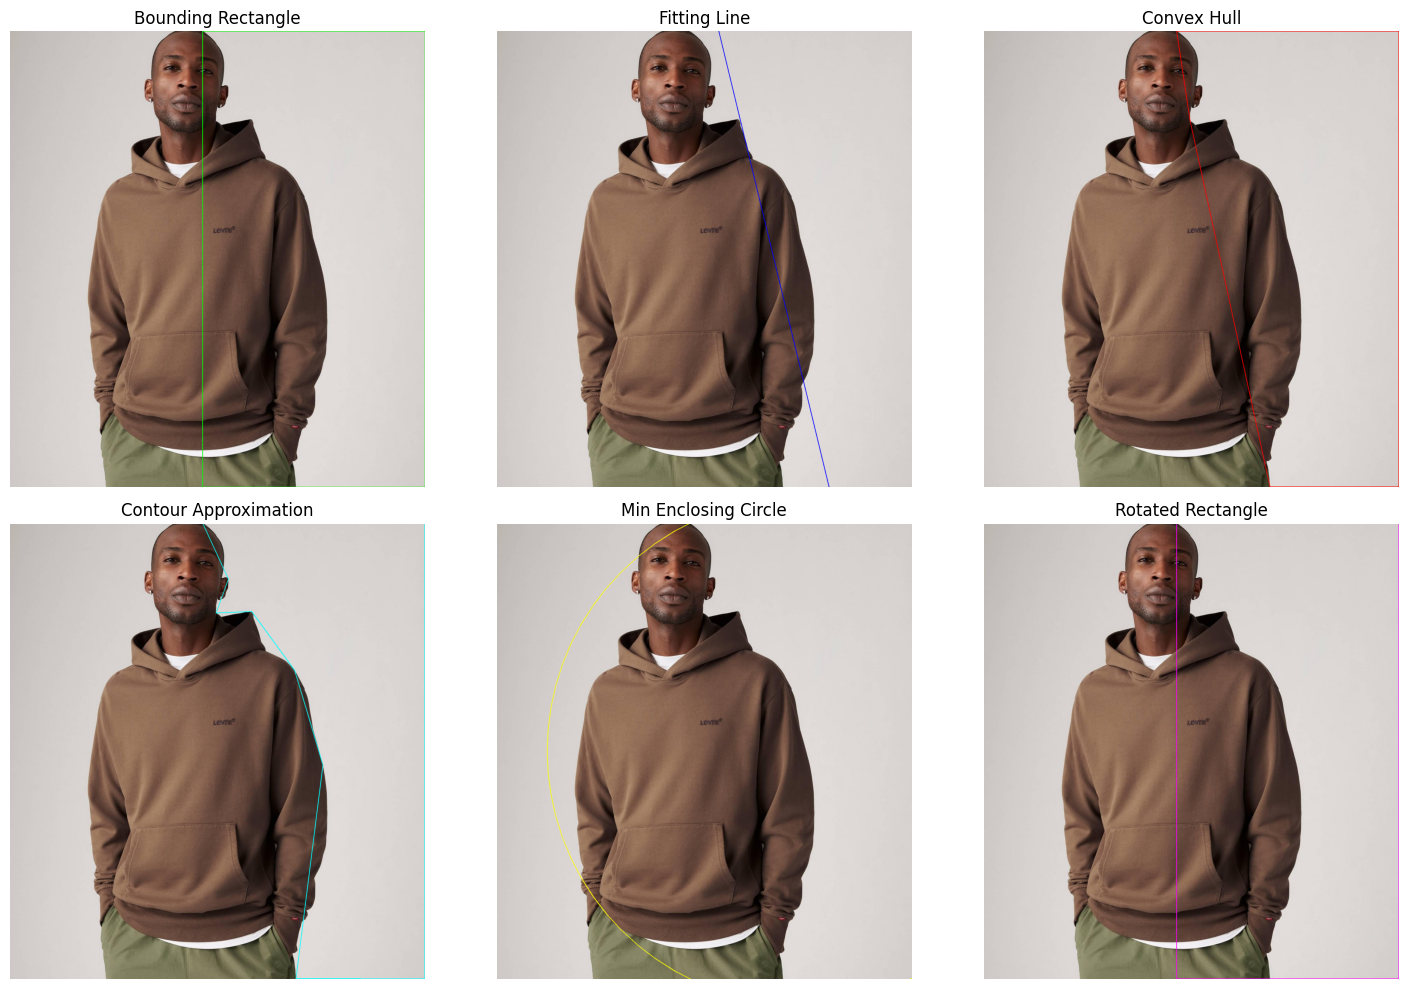

In [5]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/levis_hoodie_masculino_authentic-hoodie-a8435-0011_chicory-coffee-garment-dye_1.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours (corrected syntax)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create copies of the original image for each method
image_bounding_rect = image.copy()
image_fitting_line = image.copy()
image_convex_hull = image.copy()
image_contour_approx = image.copy()
image_min_enclosing_circle = image.copy()
image_rotated_rect = image.copy()

# Process only the largest contour
if len(contours) > 0:
    # Find the largest contour by area
    cnt = max(contours, key=cv2.contourArea)

    # 1. Straight Bounding Rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image_bounding_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 2. Fitting a Line
    [vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
    lefty = int((-x * vy / vx) + y)
    righty = int(((image.shape[1] - x) * vy / vx) + y)
    cv2.line(image_fitting_line, (image.shape[1]-1, righty), (0, lefty), (255, 0, 0), 2)

    # 3. Convex Hull
    hull = cv2.convexHull(cnt)
    cv2.drawContours(image_convex_hull, [hull], 0, (0, 0, 255), 2)

    # 4. Contour Approximation
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(image_contour_approx, [approx], 0, (255, 255, 0), 2)

    # 5. Minimum Enclosing Circle
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_min_enclosing_circle, center, radius, (0, 255, 255), 2)

    # 6. Rotated Rectangle
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image_rotated_rect, [box], 0, (255, 0, 255), 2)

# Display results
titles = [
    'Bounding Rectangle', 'Fitting Line', 'Convex Hull',
    'Contour Approximation', 'Min Enclosing Circle', 'Rotated Rectangle'
]
images = [
    image_bounding_rect, image_fitting_line, image_convex_hull,
    image_contour_approx, image_min_enclosing_circle, image_rotated_rect
]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()